**Assignment-II: Image Compression Using Principal Component
Analysis..**


**Name**:-  Samir Chaulagain

**University ID**:-  2066031

**Module leader**:- Siman Giri

**Tutor**:-Anmol Adhikari


In [ ]:
#Importing multiple libraries 
#Necessary imports:
import numpy as np
#mathmetics calculation
import matplotlib.pyplot as plt
# for data visulalization 
import seaborn as sns
#Seaborn is used to plot diagrams
import pandas as pd
# for data manipulation

In [ ]:
#Connecting the google drive to access the stored image file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Load and Prepare the data:**

Pick an color image of your choice and do the following.
1. Load the image using image reading library, you can use Pillow or matplotlib or any other library of your
confidence.




> Importing pillow library



In [ ]:
#Including Piloow library to manipulate images
from PIL import Image

Image dimensions:  3
Size of image according to three dimensions:  (512, 512, 3)


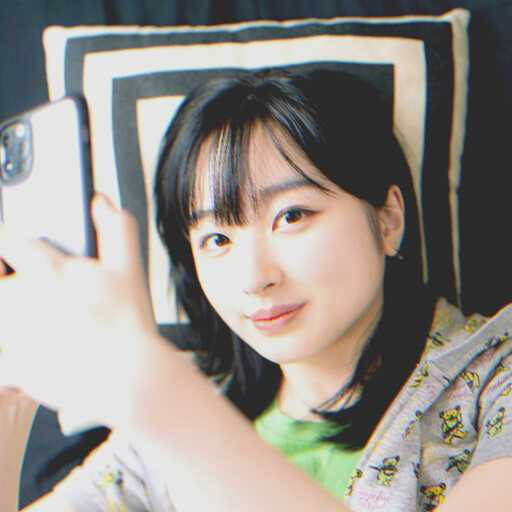

In [ ]:
#Opening the image file from the drive and storing it in a variable
img = Image.open("/content/drive/MyDrive/Coursework2/Cousrework_low_Quality_image.jpg")
#Converting the image into an array
imgArray = np.array(img)
#Printing the dimensions of the image
print("Image dimensions: ",imgArray.ndim)
#Printing the size of the image according to the dimensions
print("Size of image according to three dimensions: ",imgArray.shape)
img

2. For the simplicity, convert the image into gray scale i.e. black and white.



> Converting image into greyscale:

1.   Use the convert method of the Image class in the Python Imaging Library to change an image to grayscale (PIL). The mode argument that the convert method accepts specifies the image's color mode. The image should be converted to grayscale, as indicated by the value "L."

2. The convert method returns a new Image object with the grayscale version of the original image once the image has been converted to grayscale. The gray scale variable is then used to store the output image.
2.   The grayscale image's pixel values are contained in the NumPy array grey array. Python's NumPy library is a potent tool for manipulating numerical data. It offers several functions for making arrays, modifying them, and applying mathematical operations to them.

4. The default display method for Image objects is then used to display the grayscale image. This will depend on the environment in which you are running the code and the settings you have made for the image display.





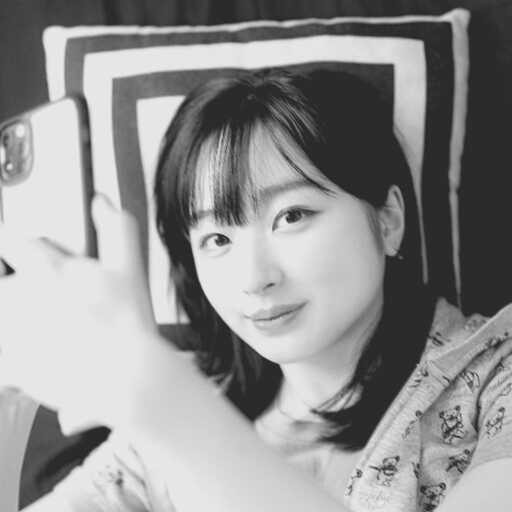

In [ ]:
#Converting the image into grayscale by determing the colormode
gray_scale = img.convert("L")
#Storing the converted image into an array for further use
grey_array = np.array(gray_scale);
#Displaying the converted image
gray_scale

**Standardize/Scale the data:**






# To assure all the initial variables are transformed to same scale, it is a most to perform scaling operation before
any PCA operation. For the same purpose, we will perform standardization of data, which satisfies the following
expression:
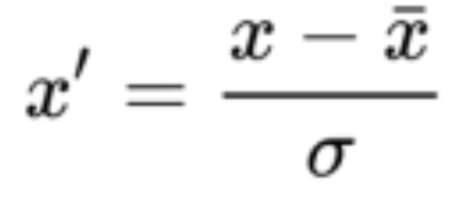

- The pixel values in a grayscale image represented as a NumPy array are first normalized before the mean and standard deviation of the pixel values are computed.

Using a list comprehension, the normalization transformation is applied to each pixel value in the ex array NumPy array. The normalization transformation (x - mean) / s deviation is applied to each pixel value x in the ex array by the list comprehension. A new NumPy array called final calc is used to store the transformed pixel values that are the end result.

In [ ]:
#Displaying the array of the grayscale image
print("The array of greyscale image: ", grey_array)
#Storing the array in another variable
ex_array = grey_array
#Calculating the mean of the stored array of the grayscale image
mean = ex_array.mean(axis=0)
#Calculating the standard deviation
s_deviation = ex_array.std(axis = 0)
#Final calculation as shown in the above equation
final_calc = np.array([(x - mean) / s_deviation for x in ex_array]) #Here, for x in ... runs throughout the array of the greyscale image
print("\n") #leaving a space to display the final calculation
final_calc

The array of greyscale image:  [[ 62  62  62 ...  54  53  53]
 [ 62  62  62 ...  52  52  52]
 [ 62  62  62 ...  51  51  51]
 ...
 [172 172 172 ... 204 204 204]
 [172 172 172 ... 204 204 204]
 [172 172 172 ... 204 204 204]]




array([[-1.58404815, -1.61785224, -1.6402068 , ..., -0.65979272,
        -0.67816147, -0.68128113],
       [-1.58404815, -1.61785224, -1.6402068 , ..., -0.68891084,
        -0.69261446, -0.69555931],
       [-1.58404815, -1.61785224, -1.6402068 , ..., -0.7034699 ,
        -0.70706746, -0.70983749],
       ...,
       [ 0.17215949,  0.14990808,  0.1261408 , ...,  1.52406629,
         1.50424028,  1.47472406],
       [ 0.17215949,  0.14990808,  0.1261408 , ...,  1.52406629,
         1.50424028,  1.47472406],
       [ 0.17215949,  0.14990808,  0.1261408 , ...,  1.52406629,
         1.50424028,  1.47472406]])

## **Calculate Covariance Matrix:**

- A covariance matrix is a square matrix that gives the covariance between pairs of elements in a dataset. The covariance between two elements is a measure of the degree to which they vary together. A positive covariance indicates that the elements tend to increase or decrease together, while a negative covariance indicates that one element tends to increase as the other decreases.The formula below gives the (i,j)-th element in a covariance matrix:

Cov(i,j) = ∑(x[i] - mean[i])(x[j] - mean[j]) / (n - 1)

Here, x[i] and x[j] are elements of the dataset, mean[i] and mean[j] are the mean values of the elements, and n is the number of samples in the dataset.

- The diagonal elements of the covariance matrix give the variance of each element in the dataset, while the off-diagonal elements give the covariance between pairs of elements.

- Covariance matrices are used in various statistical and machine learning techniques, such as principal component analysis (PCA) and the Kalman filter. Data analysis can be done in order to identify patterns and relationships in the data, as well as to reduce the dimensionality of the data.

# Each element of the covariance matrix represents covariance between each ijth element. The covariance between two elements is calculated and stored in the matrix as shown in picture below: 

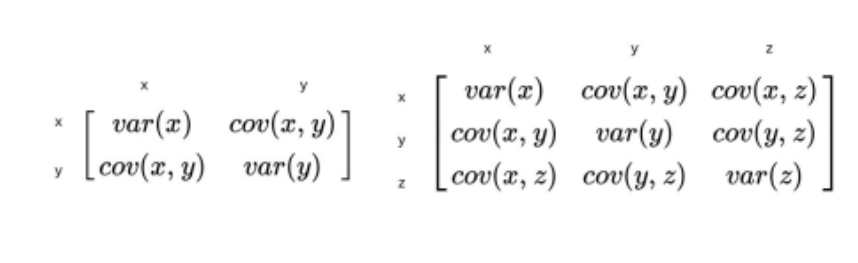

The covariance matrix is:  [[ 4.44089210e-16 -9.83632823e-03 -2.98420648e-02 ... -5.60853540e-01
  -5.55822517e-01 -5.48827292e-01]
 [-9.83632823e-03  8.88178420e-16 -7.69943460e-03 ... -5.76588459e-01
  -5.71826710e-01 -5.65091999e-01]
 [-2.98420648e-02 -7.69943460e-03  1.77635684e-15 ... -5.98906303e-01
  -5.94504545e-01 -5.88214336e-01]
 ...
 [-5.60853540e-01 -5.76588459e-01 -5.98906303e-01 ...  6.66133815e-16
  -2.01265724e-03 -8.12744916e-03]
 [-5.55822517e-01 -5.71826710e-01 -5.94504545e-01 ... -2.01265724e-03
  -1.33226763e-15 -2.92588167e-03]
 [-5.48827292e-01 -5.65091999e-01 -5.88214336e-01 ... -8.12744916e-03
  -2.92588167e-03 -2.22044605e-16]]


Text(0.5, 1.0, 'Heatmap of Value Standardization')

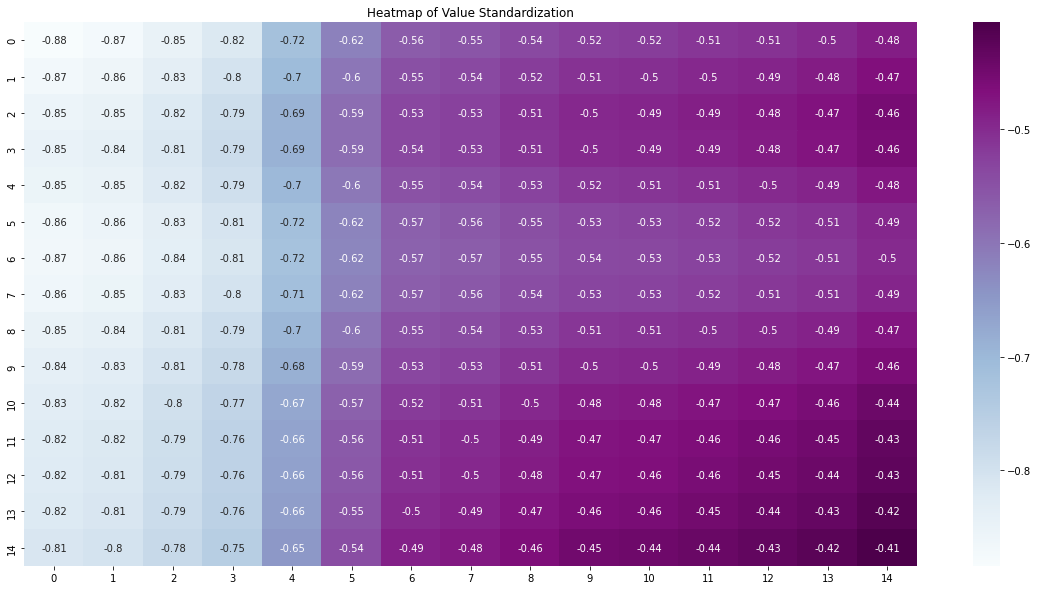

In [ ]:
#To calculate the covariance matrix:
#Calculating the mean of the result final standardization of the data from previous riddle
final_calc_mean = np.mean(final_calc, axis = 0)
#Differentiating the final value to its mean
x_cov = final_calc - final_calc_mean
#Calculating the covariance matrix using the following equation.
cov_matrix = np.array((x_cov).T.dot(x_cov) / final_calc.shape[0] - 1)
#Printing the covariance matrix
print("The covariance matrix is: ", cov_matrix)

#Plotting the heatmap of the result above
#Assigning the image size
plt.figure(figsize=(20,10))
#Plotting the heatmap 
sns.heatmap(cov_matrix[:15,60:75],cmap='BuPu' , annot = True) #annot = True writes the values in each cell 
#Labelling the heatmap 
plt.title("Heatmap of Value Standardization")

## **Eigen Decomposition:**

Decompose a covariance matrix into eigen values and eigen vectors:

                                          A(n*n)= PDPI

**Where**:
1. A(n*n): −Covariance Matrix.
2. P:- Eigen Vector of Covariance Matrix.
3. D:- Diagonal Matrix. Diagonal elements are Eigen Values.
4. PI: −Inverse of Eigen Vector.

- The eigen decomposition mathematical process is used to decompose a matrix into its eigenvalues and eigenvectors. Because eigenvalues and eigenvectors are closely related to matrix structure, they can be used to better understand and analyze the matrix. Eigenvalues and eigenvectors are useful in a variety of mathematical and computational contexts due to their numerous significant properties.

In [ ]:
#Decomposing the eigen values and eigen vectors

# Let us take the covariance matrix from the calcultion above. 
#It is a 3x3 matrix
#Storing the matrix into an array
A = np.array(cov_matrix)

# Decomposing the covariance matrix into eigenValue and eigenVector by using a function from numpy library
eigenValue, eigenVector = np.linalg.eig(A)

# From the above equation, storing the eigen vector into a variable
P = eigenVector

# From the above equation, storing the eigen value into a variable
D = np.diag(eigenValue)

# The inverse of eigrn vector can be calculated by using a method i.e linalg.inv
PI = np.linalg.inv(P)
PI

# Checking whether the reconstructed matrix is equal to the newly decomposed matrix or not. 
new_reconstruct = P @ D @ PI

#Printing the output
print(np.allclose(A, new_reconstruct)) 

True


## **Identify Principal Components:**

- Principal components are a set of orthogonal (uncorrelated) variables derived from a larger set of data in statistics and data analysis. They are used to describe the most important patterns in data and to reduce the data's dimensionality by projecting it onto a lower-dimensional space.

- The first principal component is the direction in which the data varies the most, and each subsequent component is orthogonal to the previous ones, with the property of explaining as much of the data's remaining variance as possible.

Determine the **explained** **variance** by each **principal components**, based on this we can determine how
many principal components to pick from.
• Experiment with Principal Components:

– Pick **three different combination** of principal components with **various** **explained variance value** and **compare** the result.

In [ ]:
#To calculate the explained variance

# Decomposing the matrix into eigenvalues and eigenvectors using a method
eigenValues, eigenVectors = np.linalg.eig(A)


# Sorting the values into decreasing order / decending order using argsort() method
var1 = eigenValues.argsort()[::-1] #argsort() method is generally used to sort in ascending order but the use of -1 slices the value into descending order
# For eigen values
eValues = eigenValues[var1]
#For eigen vectors
eVectors = eigenVectors[:,var1]



# Calculating the explained variance using the following formula
exp_variance = eValues / eValues.sum()
#Printing the output
exp_variance

array([ 8.90178885e+14,  6.87670938e+14,  4.69179469e+14,  2.35890188e+14,
        2.22051548e+14,  1.55535156e+14,  1.02019530e+14,  8.67295780e+13,
        7.78781882e+13,  6.63086974e+13,  5.05054028e+13,  4.52881022e+13,
        3.60789584e+13,  2.90892270e+13,  2.45742636e+13,  2.02428656e+13,
        1.74610793e+13,  1.51939196e+13,  1.34029833e+13,  1.30270676e+13,
        1.16872921e+13,  1.10101090e+13,  9.62229301e+12,  9.25851574e+12,
        8.38273562e+12,  7.57994073e+12,  7.47214751e+12,  5.86046578e+12,
        5.33428981e+12,  5.26277852e+12,  4.80342301e+12,  4.48200057e+12,
        4.24181021e+12,  3.93515080e+12,  3.52551858e+12,  3.42829496e+12,
        3.11367845e+12,  3.06355764e+12,  2.90670777e+12,  2.58092930e+12,
        2.37554040e+12,  2.35454391e+12,  2.26332720e+12,  2.05263250e+12,
        2.00814309e+12,  1.94958595e+12,  1.77228620e+12,  1.62611031e+12,
        1.50881028e+12,  1.47501140e+12,  1.37207793e+12,  1.32307438e+12,
        1.27671664e+12,  

PICKING THREE DIFFERENT EXPERIMENTAL VALUES OF PRINCIPLE COMPONENTS!

In [ ]:
#For the first sample, let the value be 1 
sample1 = 1  

#Extracting only the sample value from the eigen vector and storing it into a variable
pcs1 = eVectors[:, :sample1]
#Multiplying the difference of sample matrix to its mean value by the eigenVector of first sample
pca1 = x_cov @ pcs1

# Reconstruction of the image array through PCA
#Multiplying the pca projection by its transpose and the sum of the mean value
processedImage1 = pca1 @ pcs1.T + final_calc_mean
#Displaying the output
processedImage1

array([[-0.33149843, -0.33728828, -0.34907417, ...,  0.36768476,
         0.36415955,  0.35982848],
       [-0.32837491, -0.33411021, -0.34578505, ...,  0.36422028,
         0.36072828,  0.35643802],
       [-0.32620148, -0.33189882, -0.34349638, ...,  0.3618096 ,
         0.35834072,  0.35407885],
       ...,
       [-0.29348192, -0.29860779, -0.30904206, ...,  0.32551837,
         0.32239744,  0.31856306],
       [-0.29282919, -0.29794366, -0.30835472, ...,  0.32479439,
         0.32168039,  0.31785454],
       [-0.29235938, -0.29746564, -0.30786001, ...,  0.32427329,
         0.3211643 ,  0.31734458]])

In [ ]:
#For the first sample, let the value be 14 
sample2 = 14  
#Extracting only the sample value from the eigen vector and storing it into a variable
pcs2 = eVectors[:, :sample2]
#Multiplying the difference of sample matrix to its mean value by the eigenVector of second sample

pca2 = x_cov @ pcs2

# Reconstru+9 ction of the image array through PCA
#Multiplying the pca projection by its transpose and the sum of the mean value
processedImage2 = pca2 @ pcs2.T + final_calc_mean
#Displaying the output
processedImage2

array([[-0.11689872, -0.13555688, -0.13316485, ...,  0.59364315,
         0.59717182,  0.60444832],
       [-0.11343427, -0.13173398, -0.12796673, ...,  0.59141248,
         0.5948543 ,  0.60205657],
       [-0.11865112, -0.13745059, -0.13397842, ...,  0.58173548,
         0.5852717 ,  0.59256302],
       ...,
       [-0.32796425, -0.31941283, -0.32447629, ...,  0.75099168,
         0.7384537 ,  0.71968865],
       [-0.24481556, -0.25028022, -0.26447786, ...,  0.75745831,
         0.74761999,  0.73246057],
       [-0.17746926, -0.19219741, -0.21262161, ...,  0.76167941,
         0.75391373,  0.74154704]])

In [ ]:
#For the last sample, let the value be 20 
sample3 = 50
#Extracting only the sample value from the eigen vector and storing it into a variable
pcs3 = eVectors[:, :sample3]
#Multiplying the difference of sample matrix to its mean value by the eigenVector of last sample
pca3 = x_cov @ pcs3

# Reconstruction of the image array through PCA
#Multiplying the pca projection by its transpose and the sum of the mean value
processedImage3 = pca3 @ pcs3.T + final_calc_mean
#Displaying the output
processedImage3

array([[-0.22559793, -0.26326477, -0.27251463, ...,  0.69549408,
         0.69474678,  0.67846213],
       [-0.22655001, -0.26371186, -0.27361042, ...,  0.68810422,
         0.68715728,  0.66902548],
       [-0.23603152, -0.27135596, -0.27958097, ...,  0.66701909,
         0.6668143 ,  0.65013394],
       ...,
       [-0.61033896, -0.65711959, -0.67903298, ...,  0.74214728,
         0.6751461 ,  0.63329252],
       [-0.58231417, -0.61906381, -0.63624009, ...,  0.69716194,
         0.62391709,  0.58447995],
       [-0.51360923, -0.5373049 , -0.5498118 , ...,  0.69753597,
         0.63829233,  0.60960119]])

## **Reconstruction of the image:**

- Reconstruction of an image refers to the process of reconstructing an image from some form of representation of that image. This can be done for a variety of reasons, such as to remove noise or compression artifacts, or to reconstruct a high-resolution image from a lower-resolution version.

Reconstruct the image based on number of principal components you picked in step **5.5.**
Reconstruct all three images and conclude the result based on your observation. Display the reconstructed
image, experiment with various number of components.

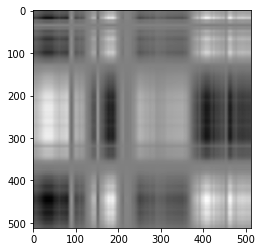

In [ ]:
#Reconstruction of the image according to the first sample provided 
plt.imshow(processedImage1,cmap="gray")

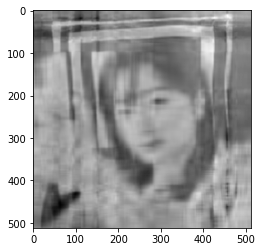

In [ ]:
#Reconstruction of the image according to the second sample provided

plt.imshow(processedImage2,cmap="gray")

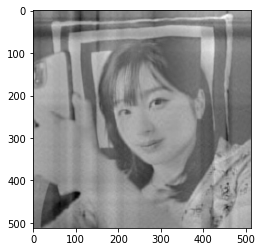

In [ ]:
#Reconstruction of the image according to the last sample 
plt.imshow(processedImage3,cmap="gray")

**Description**

- A statistical method called Principle Component Analysis can be used to find patterns in a dataset. PCA is primarily used to decrease a dataset's dimension so that it can be projected into a smaller, more focused dataset. PCA lowers the dimensionality of a dataset and projects it into a smaller dimension. Machine learning and data analysis are the main applications for this technique. The direction of the data that exhibits the greatest variance is represented by the first principal component, followed by the direction of the next greatest variation and so on.

The variance in quality of the image could be seen from the above results. More smaller the sample value lower the variance the dataset provides, due to this the picture results in unclear. Similarly, more the sample value, higher the variance the dataset provides, due to this the picture results more clearer.Let's look at the results one by one.

1. I used PCA sample 1, which is the smallest sample size, for the first outcome. The image deploys a lot of variance as a result. The image is completely illegible and unintelligible. The image is displayed in gray color mode with complete blurring. The PCA's ability to display the results in a smaller lower-dataset causes the image to be distorted and subsequently ambiguous.

2. In order to get the second result, I used PCA sample number 14, so the value is marginally higher than the first. As a result, the image deploys variance in comparison to the first one. The picture is a little bit clearer than the first one, and we can sort of guess what it's about. The quality of the image also improves as the sample value is raised.

3. In order to get the second result, I used PCA sample number 14, so the value is marginally higher than the first. As a result, the image deploys variance in comparison to the first one. The picture is a little bit clearer than the first one, and we can sort of guess what it's about. The quality of the image also improves as the sample value is raised.Because PCA can reduce the number of features in the data, which can enhance the performance and computational efficiency of the algorithms, it is frequently employed as a preprocessing step for machine learning methods. As we may plot the data along the principal components rather than in the original space, it is also helpful for viewing high-dimensional data in a lower-dimensional space.

